# Trompo de Kovalevskaya

El trompo de Kovalevskaya fue descubierto por Sofya Kovalevskaya y presentado en su tesis en 1888. El trompo cumple la condición de que $I_1=I_2=2I$ y $I_3=I$. Las ecuaciones de movimiento del trompo vienen dadas por las ecuaciones de Euler:

\begin{equation}
2I\dot{p} = qr \\
2I\dot{q} = -pr - c\gamma'' \\
I\dot{r} = c\gamma'
\end{equation}


\begin{equation}
\dot{\gamma} = r\gamma' - q\gamma'' \\
\dot{\gamma'} = p\gamma'' - r\gamma \\
\dot{\gamma''} = q\gamma -p\gamma'
\end{equation}

Se pueden realcionar los cosenos directores $\gamma$, $\gamma´$,$\gamma´´$ con los ángulos de Euler de la siguiente forma:

\begin{equation}
\gamma=sin(\theta)sin(\phi) \\
\gamma´=sin(\theta)cos(\phi) \\
\gamma´´=cos(\theta)
\end{equation}


Esta relación puede ser comprobada fácilmente utilizando las ecuaciones de Euler dadas por Landau:

\begin{equation}
\Omega_1=\dot \phi sin(\theta) sin(\psi) +\dot (\theta) cos(\psi) \\
\Omega_2=\dot \phi sin(\theta) cos(\psi) -\dot (\theta) sin(\psi) \\
\Omega_3=\dot \phi cos(\theta) +\dot (\psi) 
\end{equation}

De estas mismas puede obtenerse las siguientes relaciones para las derivadas de los ángulos:

\begin{equation}
\dot\phi=\frac{\Omega_1 sin(\psi)+\Omega_2 cos(\psi)}{sin(\theta)}\\
\dot \theta=\Omega_1 cos(\psi)-\Omega_2 sin(\psi) \\
\dot \psi=\Omega_3-\dot \phi cos(\theta)
\end{equation}

A continuación implementamos una función (solve_system()) haciendo uso de Odeint para resolver las ecuaciones diferenciales correspondientes a p, q, r (velocidades angulares) y a $\theta$ y $\psi$. A partir de la solución de estas se puede calcular la posición, la velocidad y el momentum.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from scipy.integrate import odeint

#Función para resolver el sistema dadas unas condiciones iniciales
def solve_system(p0, q0, r0, th0, ps0, t0, t1, nt=100000):
    #arreglo con las condiciones iniciales 
    Y0=[p0, q0, r0, th0, ps0] 
    #tiempo de duración
    t=np.linspace(t0,t1,nt) 

    global M
    M=1
    g=-9.8
    I=1
    global x0
    x0=5
    y0=0
    z0=0
    c=M*g*x0

    #Función que declara las ecuaciones diferenciales
    def g(Y,t):
        p,q,r,th,ps = Y 

        dp = q*r/(2*I)
        dq = (-p*r - c*np.cos(th))/(2*I)
        dr = c*np.sin(th)*np.cos(ps)/I

        dth = p*np.cos(ps) - q*np.sin(ps)
        dps = r - (1/np.sin(th))*(p*np.sin(ps) + q*np.cos(ps))*np.cos(th)

        return np.array([dp,dq,dr,dth,dps])
    
    #Solución a las ecuaciones diferenciales
    sol=odeint(g,Y0,t)

    w1 = sol[:,0]
    w2 = sol[:,1]
    w3 = sol[:,2]
    theta = sol[:,3]
    psi = sol[:,4]
    
    return w1, w2, w3, theta, psi
  
#Función que calcula la posición del centro de masas en el sistema inercial
def position(psi, theta):
    X = x0*np.sin(psi)*np.sin(theta)
    Y = x0*np.cos(psi)*np.sin(theta)
    Z = x0*np.cos(theta)
    return X, Y, Z

#Función que calcula la velocidad del centro de masa. Este cálculo se hace de forma
#aproximada, usando la variación de la posición en cada instante de tiempo.
def velocidad(X,t0,t1,nt=100000):
    t = np.linspace(t0,t1,nt)
    Vx = np.zeros(nt-1)
    
    for i in range(len(Vx)):
        Vx[i] = (X[i+1]-X[i])/(t[i+1]-t[i])
    
    return Vx
    
#Función que calcula el momento lineal del sistema (mediante la masa total y la velocidad
#del centro de masa)
def momentum(X,Y,Z,t0,t1,nt=100000):
    mx = M*velocidad(X,t0,t1,nt)
    my = M*velocidad(Y,t0,t1,nt)
    mz = M*velocidad(Z,t0,t1,nt)
    
    return mx, my, mz

A continuación declaramos las funciones para graficar las distintas variables que resultan de resolver el sistema. Vamos a graficar la velocidad angular asociada a cada eje principal, y los ángulos de Euler $\theta$ y $\psi$, ambas respecto al tiempo. El ángulo $\phi$ no fue calculado directamente debido a que no es necesario para determinar la posición del centro de masas, ni otras cantidades físicas del sistema. Adicionalmente graficamos el espacio de fase respecto a cada eje del sistema inercial.

In [36]:
# Función para graficar la velocidad angular
def graph_ang_speed(w1, w2, w3,t0,t1,nt=100000):
    t = np.linspace(t0,t1,nt)
    
    plt.figure(figsize=(14,9))
    plt.title("Variación de las velocidades angulares")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Velocidad angular [rad/s]")
    plt.plot(t,w1,label='$\Omega_1$')
    plt.plot(t,w2,label='$\Omega_2$')
    plt.plot(t,w3,label='$\Omega_3$')
    plt.grid()
    plt.legend()
    plt.show()

#Función para graficar la posición angular
def graph_ang_pos(psi, theta, t0, t1,nt=100000):
    t = np.linspace(t0,t1,nt)
    plt.figure(figsize=(14,9))
    plt.title("Variación de la posición angular")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Ángulo [rad]")
    plt.plot(t,theta,label='$\\theta$')
    plt.plot(t,psi, label='$\psi$')
    plt.grid()
    plt.legend()
    plt.show()
    
#Funcion para graficar el espacio de fase
def graph_phase(X,Y,Z,t0,t1,nt=100000):
    mx, my, mz = momentum(X,Y,Z,t0,t1,nt)
    plt.figure(figsize=(14,9))
    plt.title("Espacio de fases")
    plt.xlabel("Posición [m]")
    plt.ylabel("Momentum [kg m/s]")
    plt.plot(X[:-1],mx,label="Momento respecto al eje x")
    plt.plot(Y[:-1],my,label="Momento respecto al eje y")
    plt.plot(Z[:-1],mz,label="Momento respecto al eje z")
    plt.grid()
    plt.legend()
    plt.show()

In [37]:
#Función que implementa la solución de las ecuaciones diferenciales 
def main_graph(p0, q0, r0, th0, ps0, t0, t1, nt=100000):
    w1, w2, w3, theta, psi = solve_system(p0, q0, r0, th0, ps0, t0, t1, nt)
    X, Y, Z = position(psi, theta)
    
    graph_ang_speed(w1, w2, w3,t0, t1, nt)
    graph_ang_pos(psi, theta, t0, t1, nt)
    graph_phase(X,Y,Z,t0,t1, nt)

A continuación analizaremos algunos casos particulares con valores específicos para las condiciones iniciales del trompo de Kovaleskaya.

Para el análisis se observaran las gráficas hechas con las funciones definidas anteriormente, y se analizara la animación de la trayectoria del centro de masa. Las animaciones se elaboran con el script .py adjunto y están adjuntas a este Notebook, puesto que es más cómodo elaborar animaciones en archivos .py

En el análisis tendremos en cuenta el siguiente trompo de Kovaleskaya:

![title](Kovaleskaya_top.png)

donde $\Omega_1$ va dirigido a lo largo del eje 1, $\Omega_2$ a lo largo del eje 2 y $\Omega_3$ a lo largo del eje 3.

Iniciemos por analizar los casos en los que la velocidad angular solo tiene una componente.

Para el caso en el que $\mathbf{ \Omega } = (1,0,0)$:

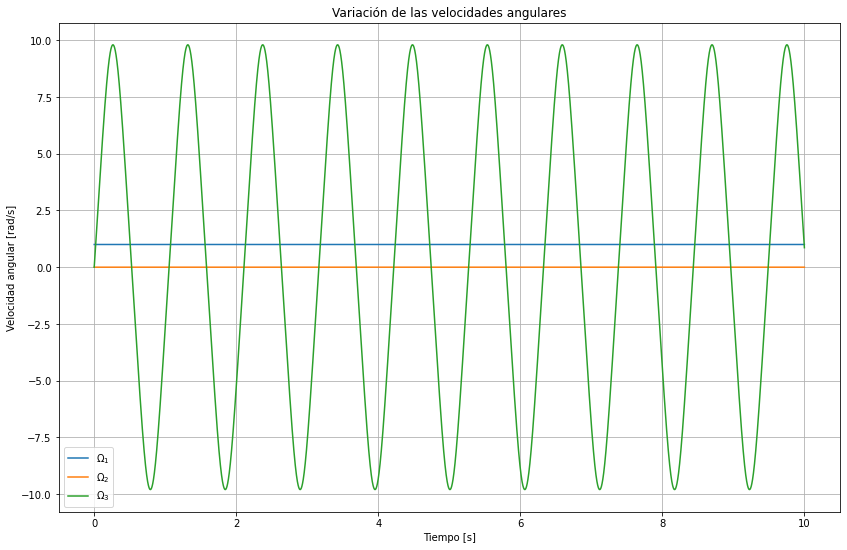

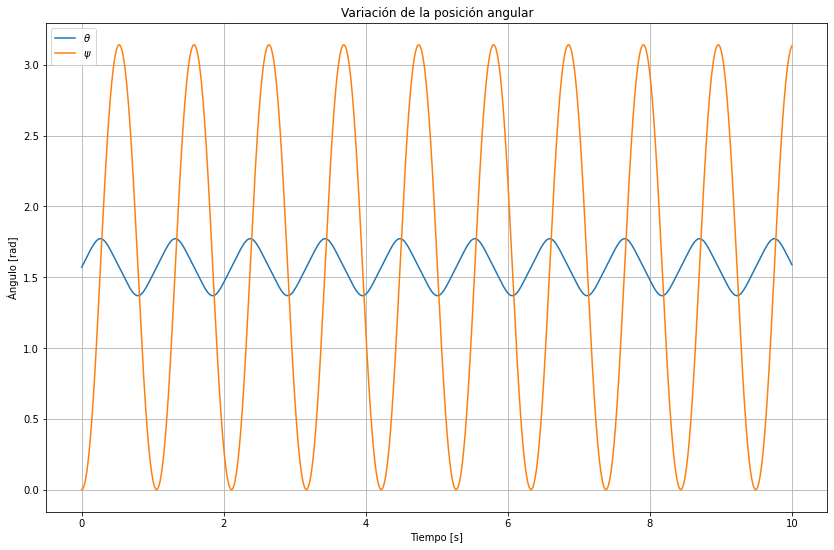

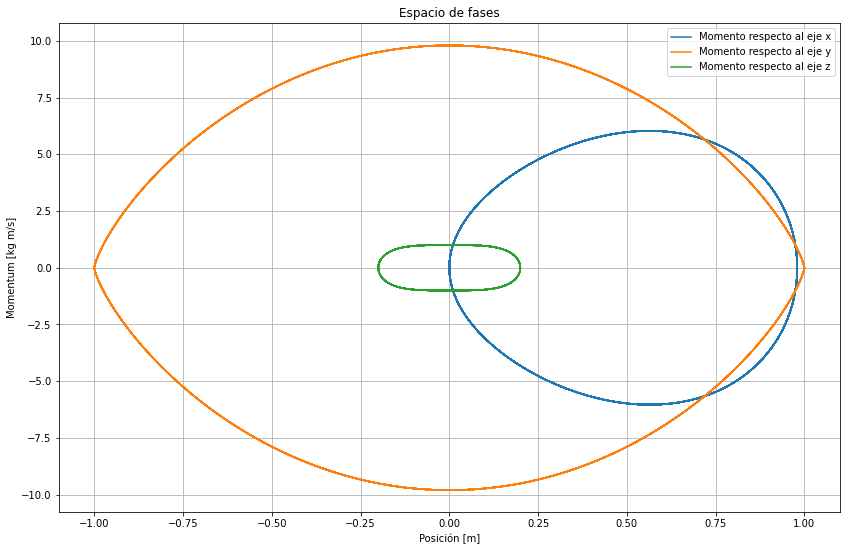

In [34]:
main_graph(1,0,0,np.pi/2,0,0,10,100000)

De acuerdo con la gráfica de las velocidades angulares, vemos que $\Omega_3$ hace un movimiento oscilatorio, el cual corresponder

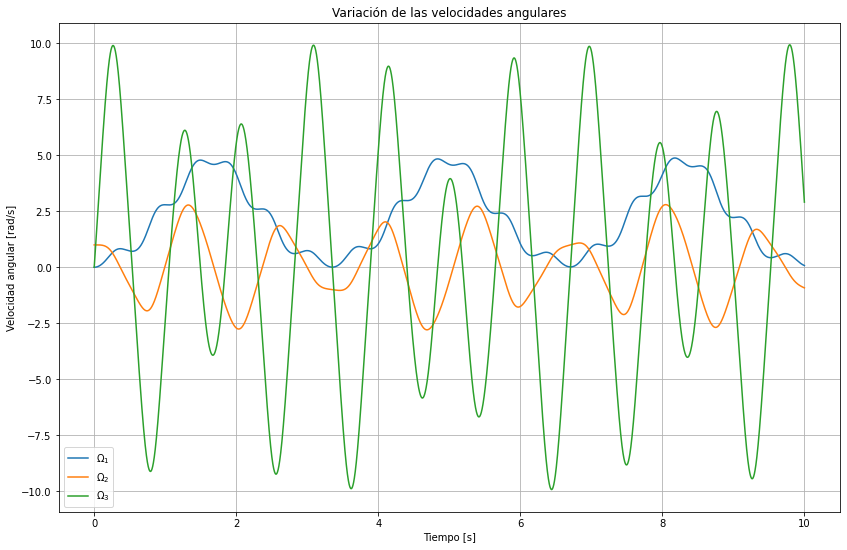

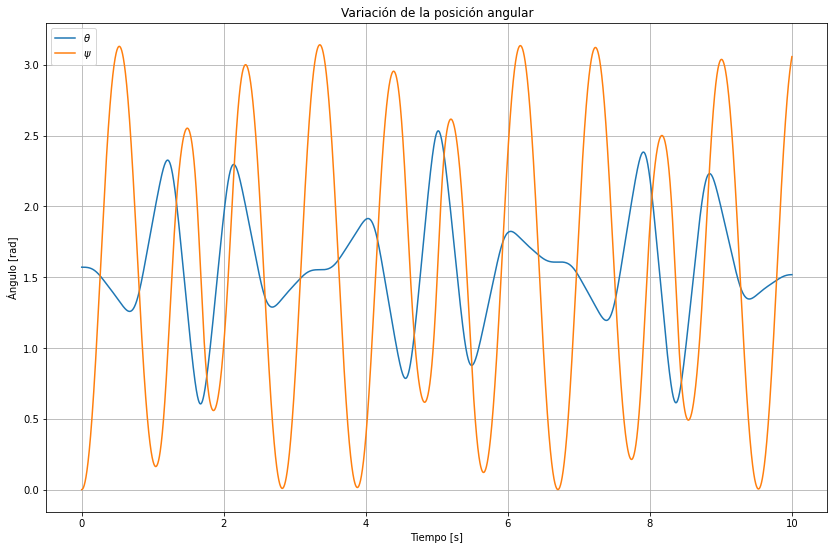

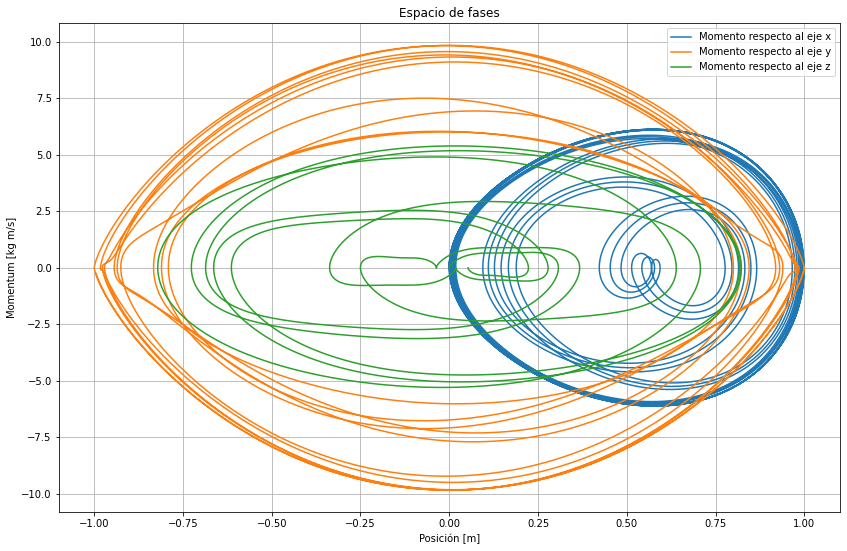

In [30]:
main_graph(0,1,0,np.pi/2,0,0,10,10000)

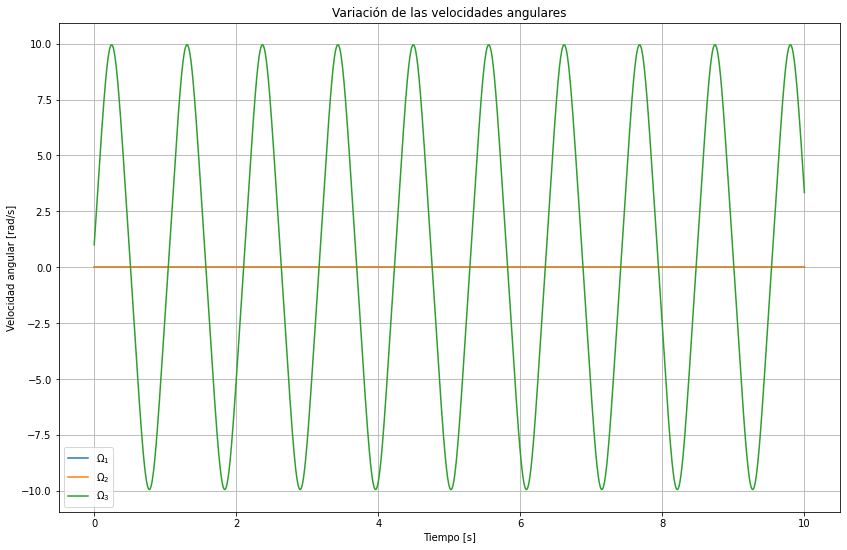

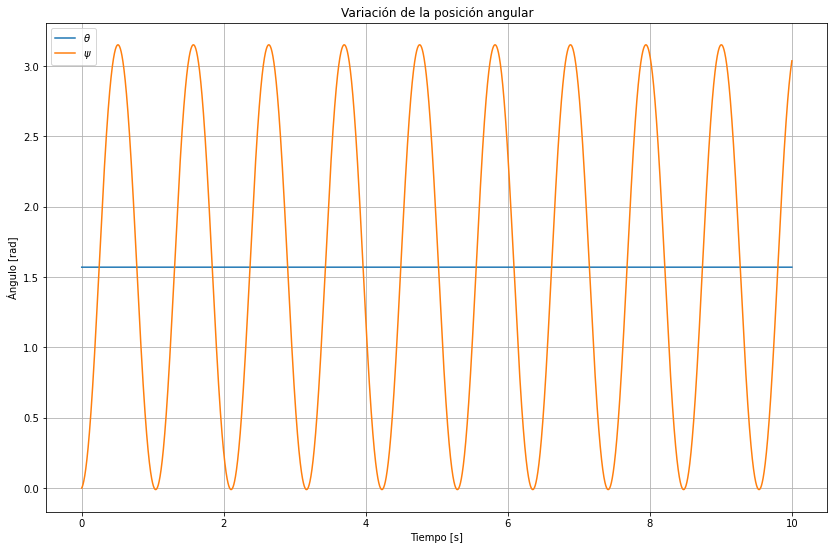

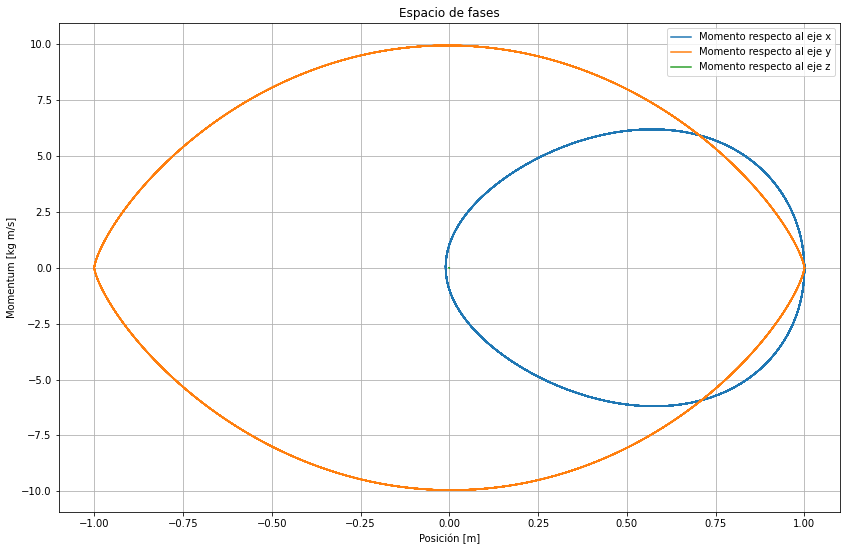

In [31]:
main_graph(0,0,1,np.pi/2,0,0,10,10000)

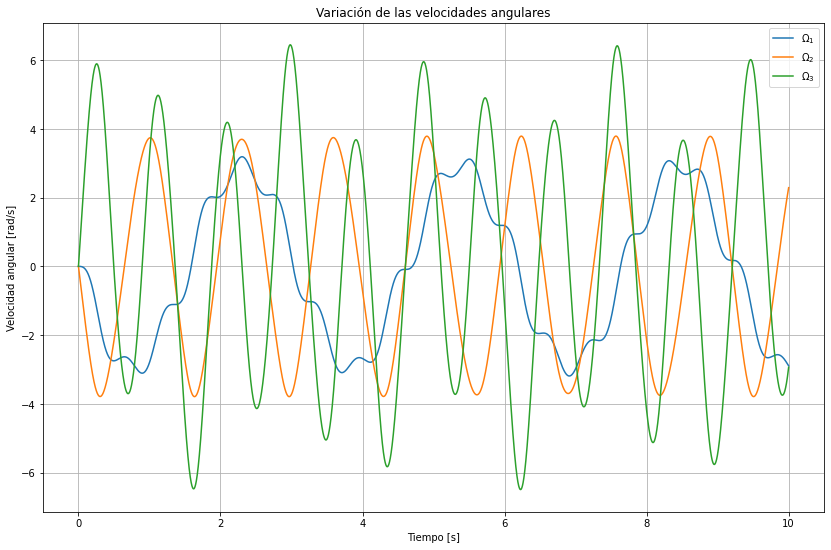

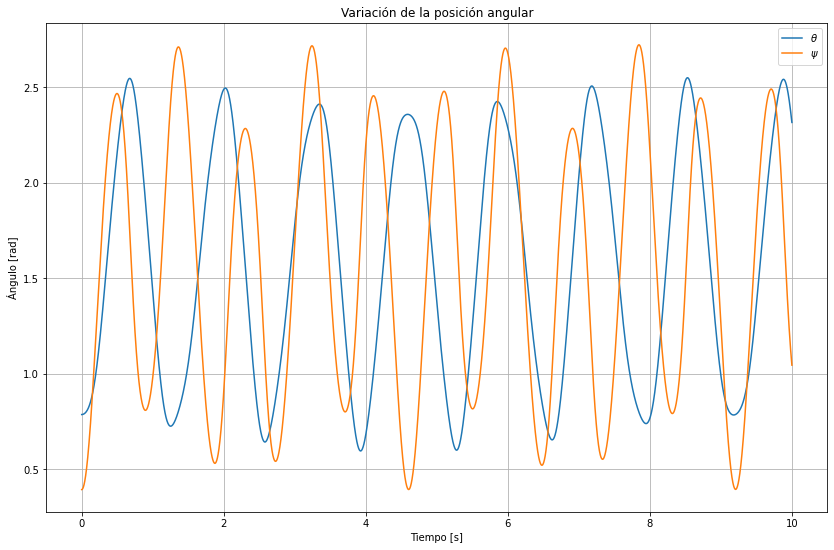

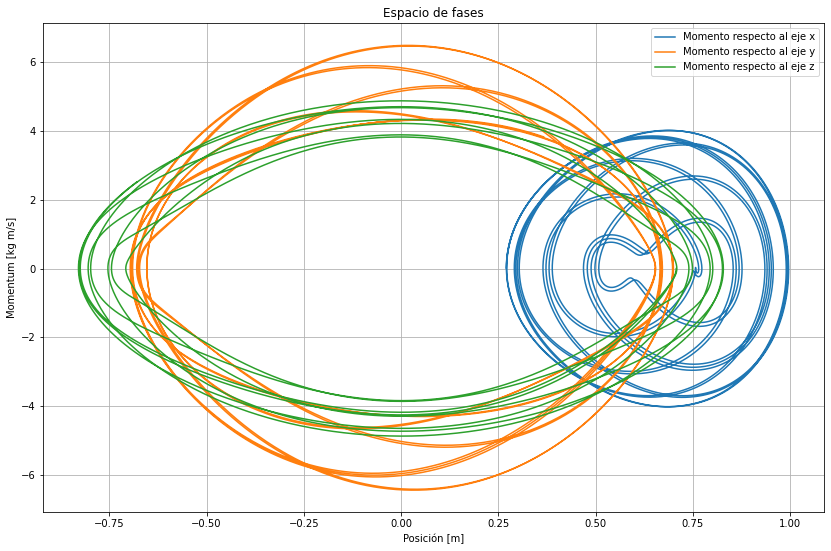

In [33]:
main_graph(0,0,0,np.pi/4,np.pi/8,0,10,10000)